In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [24]:
PALETTE=['black', 'silver', 'tomato', 'royalblue',
        'blueviolet', 'peachpuff', 'midnightblue','magenta', 'deeppink']
sns.set_palette(PALETTE)
BACKCOLOR = '#f6f5f5'

from IPython.core.display import HTML

In [25]:
def multi_table(table_list):
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

In [26]:
def cat_dist(data, var, hue, msg_show=True):
    total_cnt = data[var].count()
    f, ax = plt.subplots(1, 2, figsize=(25, 8))
    hues = [None, hue]
    titles = [f"{var}'s distribution", f"{var}'s distribution by {hue}"]

    for i in range(2):
        sns.countplot(data[var], edgecolor='black', hue=hues[i], linewidth=1, ax=ax[i], data=data)
        ax[i].set_xlabel(var, weight='bold', size=13)
        ax[i].set_ylabel('Count', weight='bold', size=13)
        ax[i].set_facecolor(BACKCOLOR)
        # ax[i].spines[['top', 'right']].set_visible(False)
        ax[i].set_title(titles[i], size=15, weight='bold')
        for patch in ax[i].patches:
            x, height, width = patch.get_x(), patch.get_height(), patch.get_width()
            if msg_show:
                ax[i].text(x + width / 2, height + 3, f'{height} \n({height / total_cnt * 100:2.2f}%)', va='center', ha='center', size=12, bbox={'facecolor': 'white', 'boxstyle': 'round'})
    plt.show()

In [27]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_submission = pd.read_csv("sample_submission.csv")


spaceship_df = pd.concat([df_train, df_test], axis=0)

In [28]:
def continuous_dist(data, x, y):
    f, ax = plt.subplots(1, 4, figsize=(35, 10))
    sns.histplot(data=df_train, x=y, hue=x, ax=ax[0], element='step')
    sns.violinplot(x=data[x], y=data[y], ax=ax[1], edgecolor='black', linewidth=1)
    sns.boxplot(x=data[x], y=data[y], ax=ax[2])
    sns.stripplot(x=data[x], y=data[y], ax=ax[3])
    for i in range(4):
        # ax[i].spines[['top','right']].set_visible(False)
        ax[i].set_xlabel(x, weight='bold', size=20)
        ax[i].set_ylabel(y, weight='bold', size=20)
        ax[i].set_facecolor(BACKCOLOR)
    f.suptitle(f"{y}'s distribution by {x}", weight='bold', size=25)
    plt.show()

In [29]:
spaceship_df.head(20).style.background_gradient(cmap='Blues')


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.000000,False,0.000000,0.000000,0.000000,0.000000,0.000000,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.000000,False,109.000000,9.000000,25.000000,549.000000,44.000000,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.000000,True,43.000000,3576.000000,0.000000,6715.000000,49.000000,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.000000,False,0.000000,1283.000000,371.000000,3329.000000,193.000000,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.000000,False,303.000000,70.000000,151.000000,565.000000,2.000000,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.000000,False,0.000000,483.000000,0.000000,291.000000,0.000000,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.000000,False,42.000000,1539.000000,3.000000,0.000000,0.000000,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.000000,False,0.000000,0.000000,0.000000,0.000000,nan,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.000000,False,0.000000,785.000000,17.000000,216.000000,0.000000,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.000000,False,0.000000,0.000000,0.000000,0.000000,0.000000,Erraiam Flatic,True


In [30]:
print(df_train.shape)
print(df_test.shape)
print(spaceship_df.shape)


(8693, 14)
(4277, 13)
(12970, 14)


In [31]:
spaceship_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12970 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.5+ MB


In [32]:
spaceship_df.isnull().sum()


PassengerId        0
HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
dtype: int64

In [33]:
nominal_vars = ['HomePlanet', 'CryoSleep', 'Cabin', 'Desination', 'VIP', 'Name']

continuous_vars = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

target = 'Transported'

In [34]:
train_st = df_train[continuous_vars].describe()
test_st = df_test[continuous_vars].describe()
spaces_st = spaceship_df[continuous_vars].describe()
multi_table([spaces_st, train_st, test_st])

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000
,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000


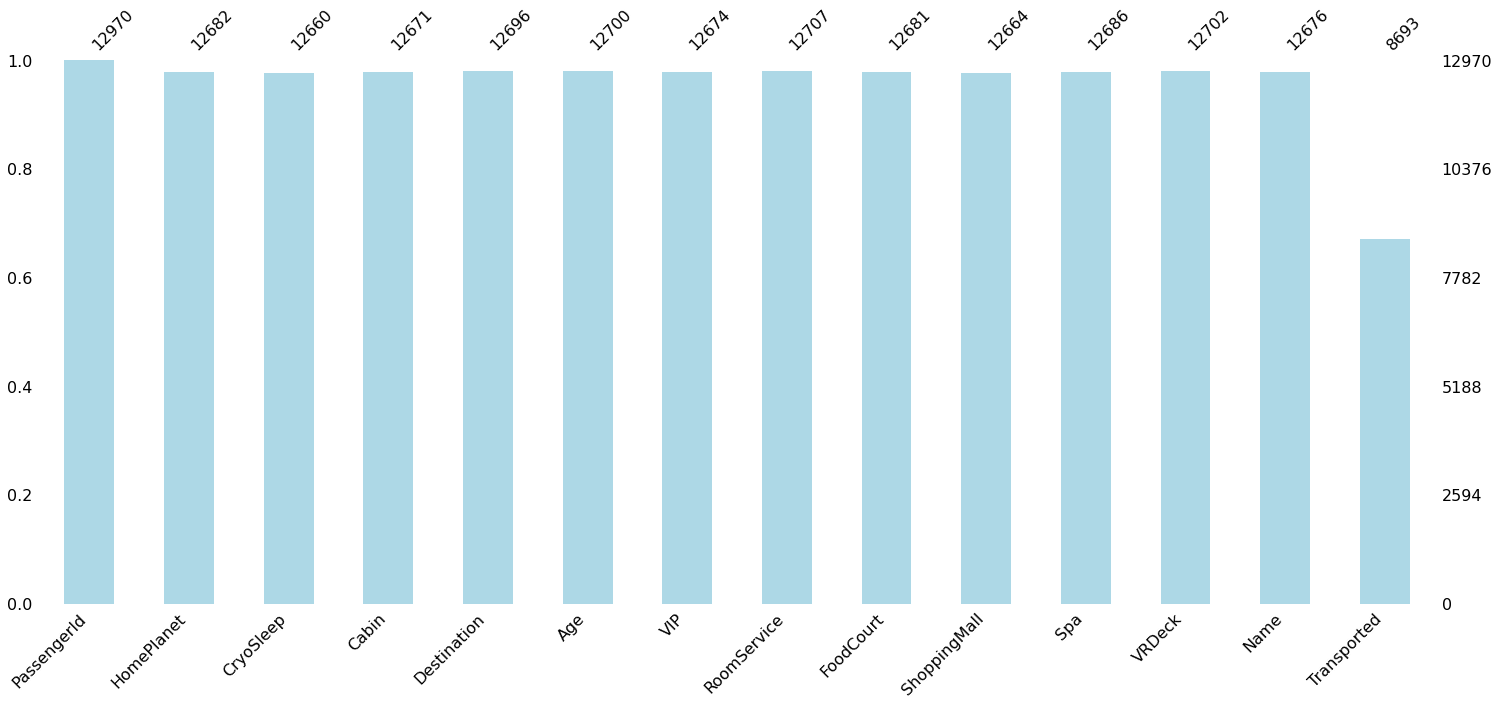

In [35]:
import missingno as msno
msno.bar(spaceship_df, color='lightblue')


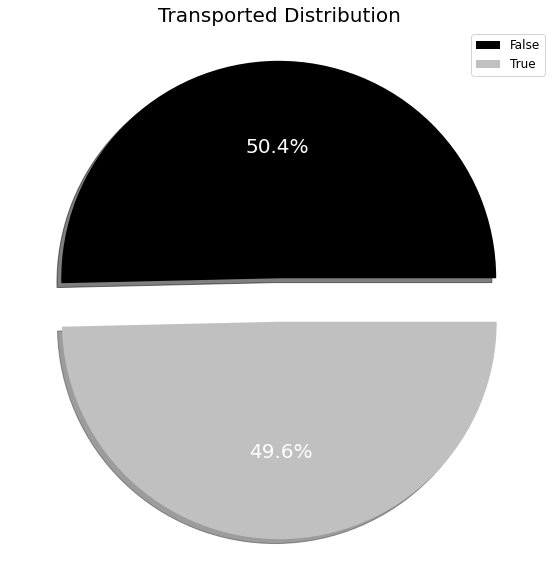

In [36]:
plt.subplots(figsize=(25, 10))
plt.pie(df_train.Transported.value_counts(), shadow=True, explode=[.1,.1], autopct='%.1f%%', textprops={'fontsize': 20, 'color': 'white'})
plt.title('Transported Distribution', size=20)
plt.legend(['False', 'True'], loc='best', fontsize=12)
plt.show()

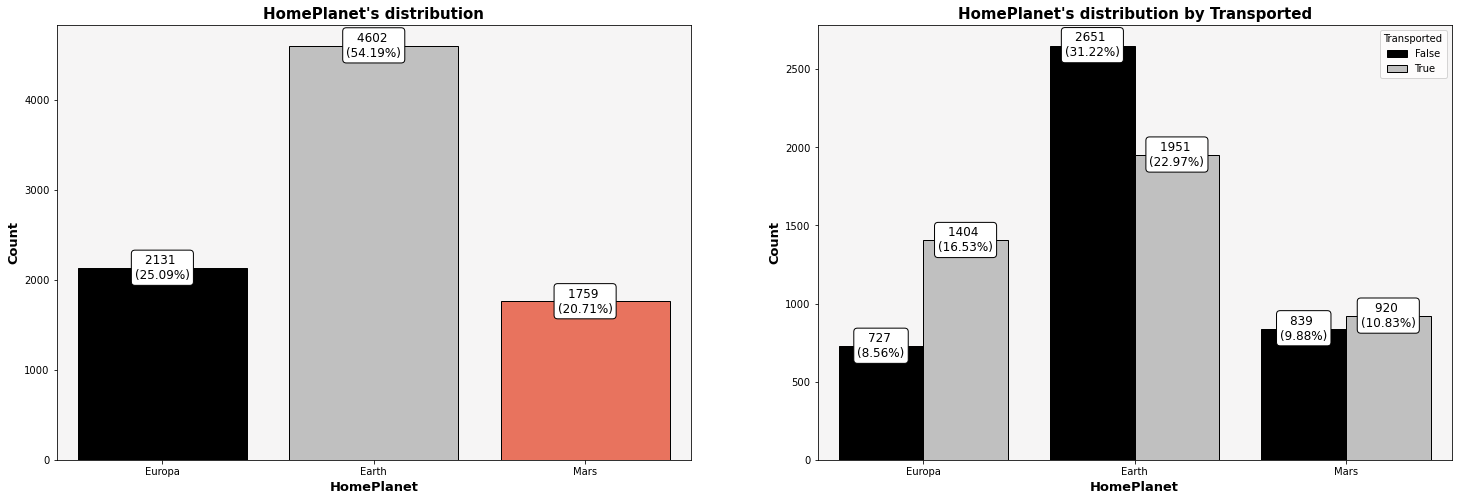

,count,sum,mean
,Transported,Transported,Transported
HomePlanet,,,
Earth,4602,1951.000000,0.423946
Europa,2131,1404.000000,0.658846
Mars,1759,920.000000,0.523024


In [37]:
cat_dist(df_train, var='HomePlanet', hue='Transported')
df_train.pivot_table(index="HomePlanet", values="Transported", aggfunc=['count', 'sum', 'mean']).style.background_gradient(vmin=0, cmap='winter')

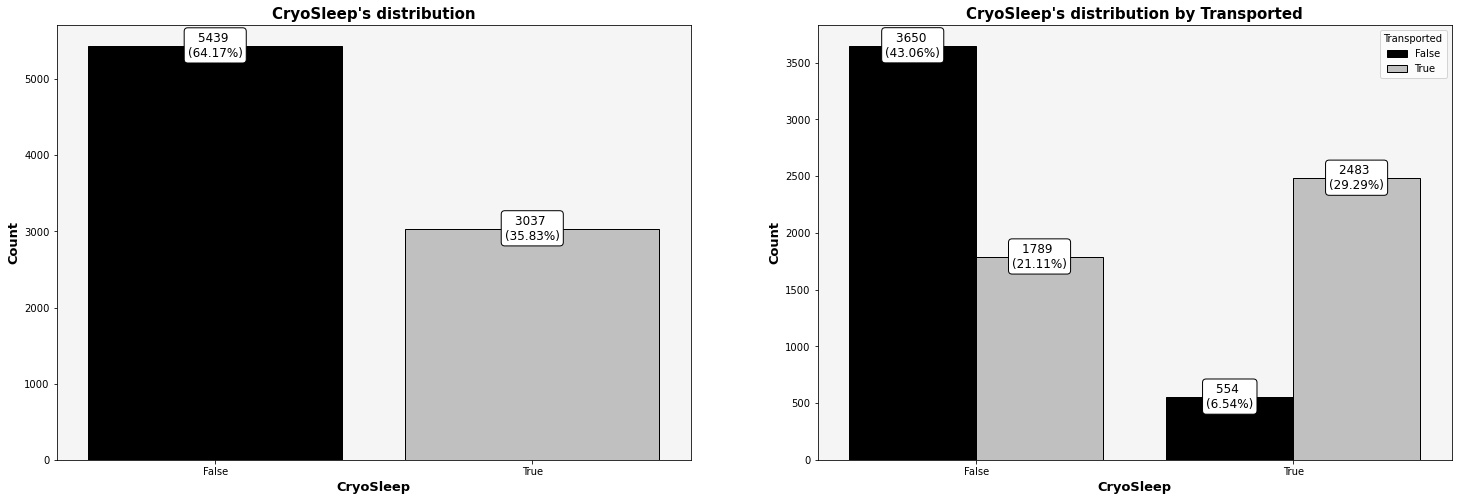

,count,sum,mean
,Transported,Transported,Transported
CryoSleep,,,
False,5439,1789.000000,0.328921
True,3037,2483.000000,0.817583


In [38]:
cat_dist(df_train, var='CryoSleep', hue='Transported')
df_train.pivot_table(index="CryoSleep", values="Transported", aggfunc=['count', 'sum', 'mean']).style.background_gradient(vmin=0, cmap='Greens')

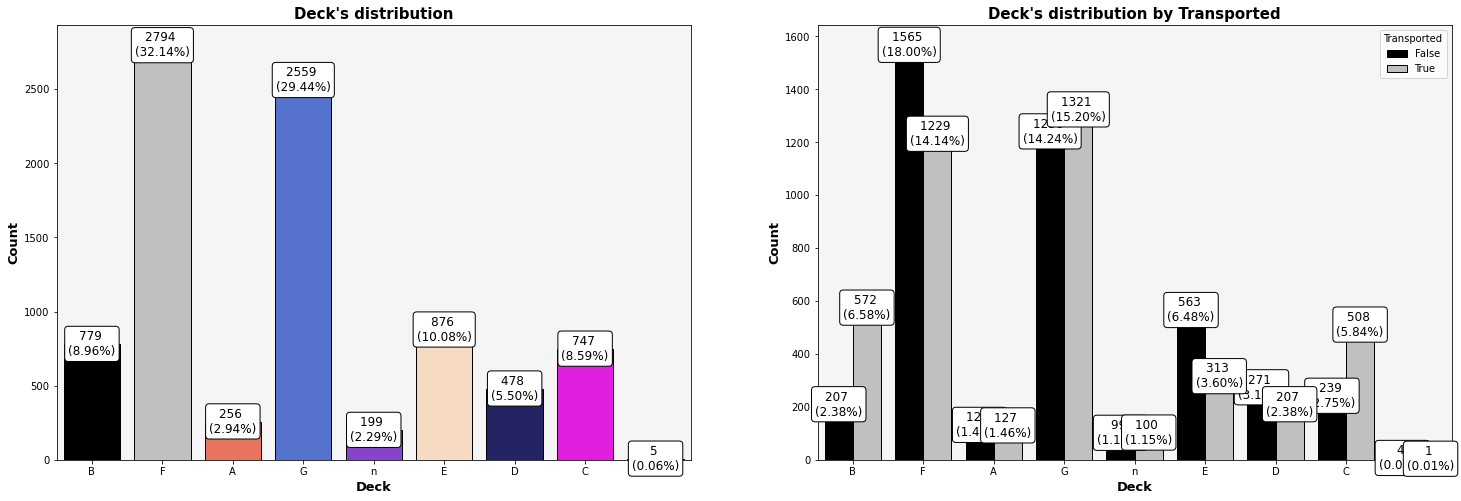

In [39]:
tmp = df_train.copy()
tmp['Deck'] = df_train.Cabin.apply(lambda x:str(x)[:1])
tmp['side'] = df_train.Cabin.apply(lambda x:str(x)[-1:])

cat_dist(tmp, var='Deck', hue='Transported')

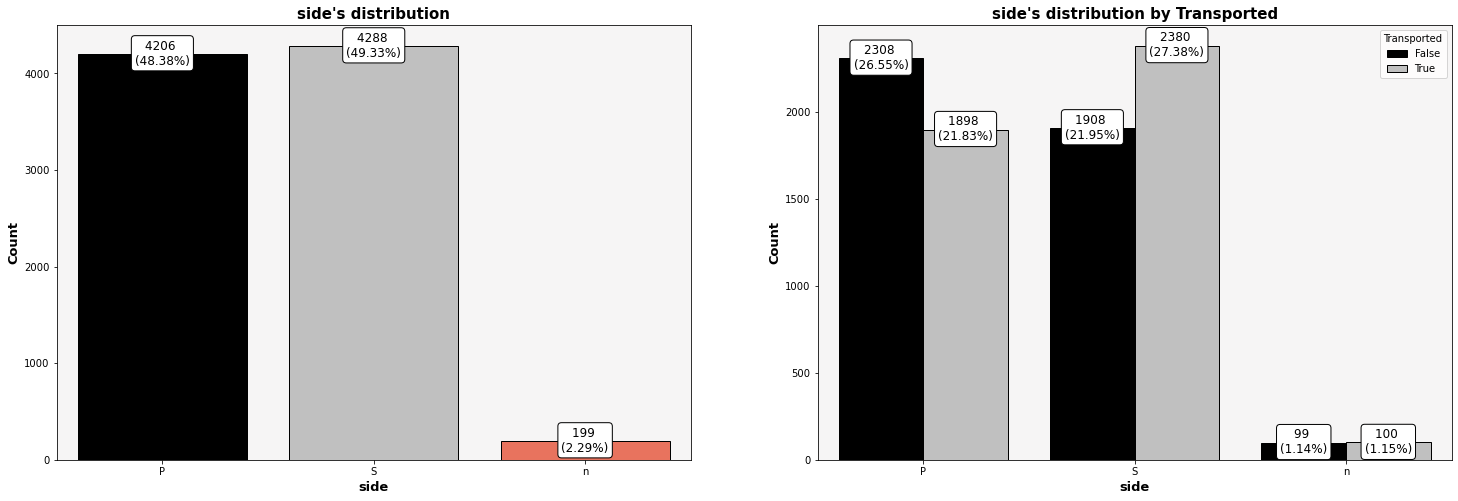

In [40]:
cat_dist(tmp, var='side', hue='Transported')


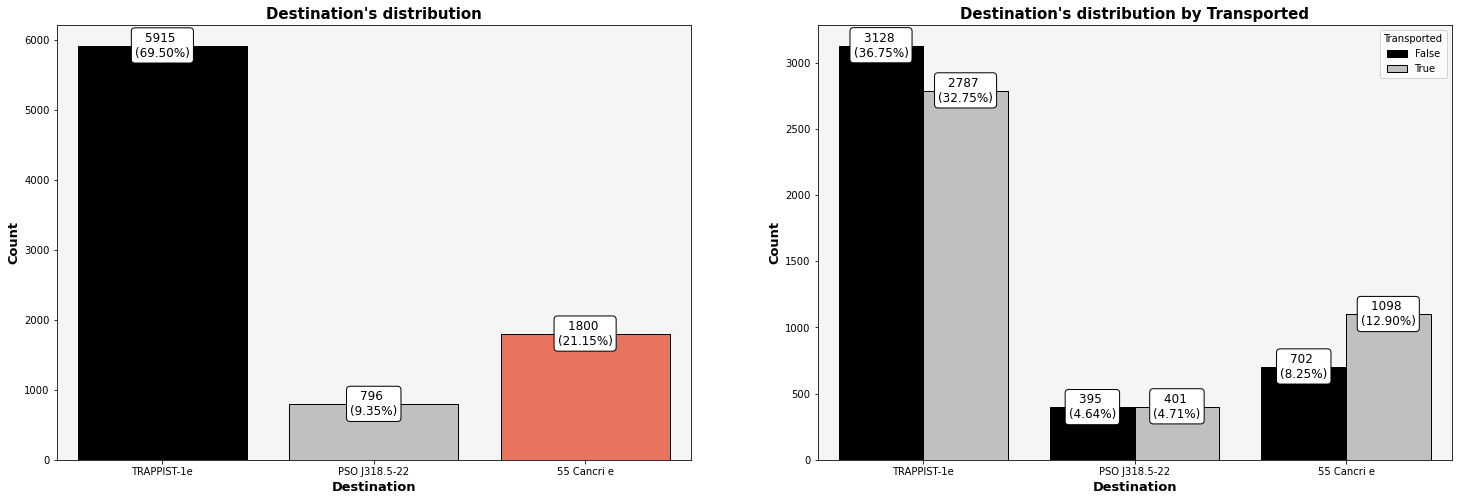

In [41]:
cat_dist(df_train, var='Destination', hue='Transported')


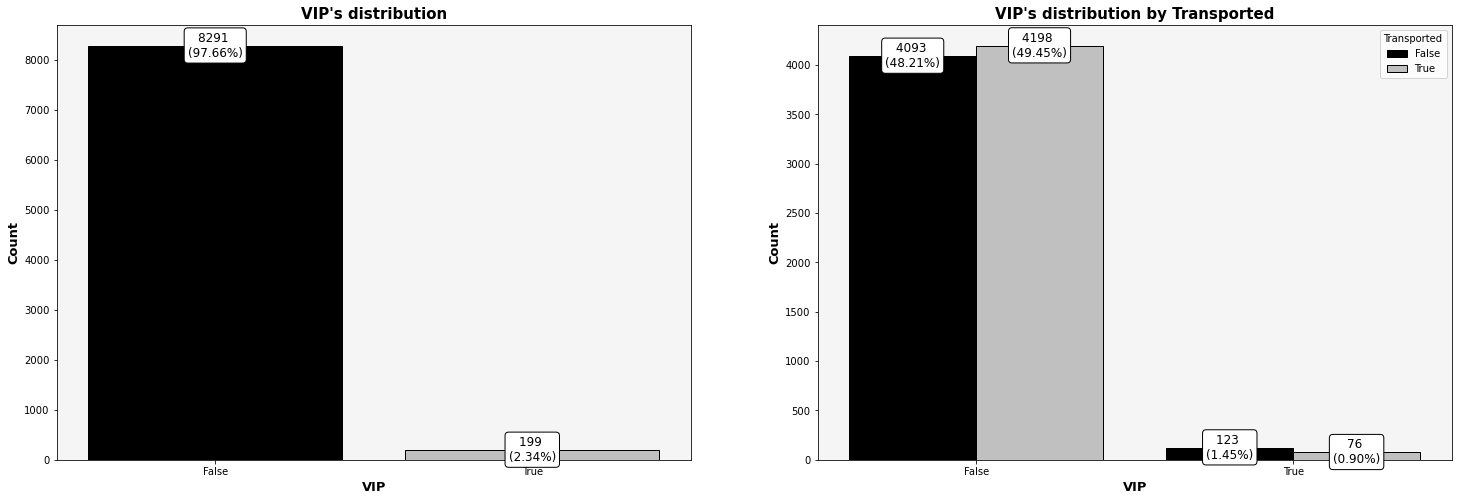

In [42]:
cat_dist(df_train, var='VIP', hue='Transported')


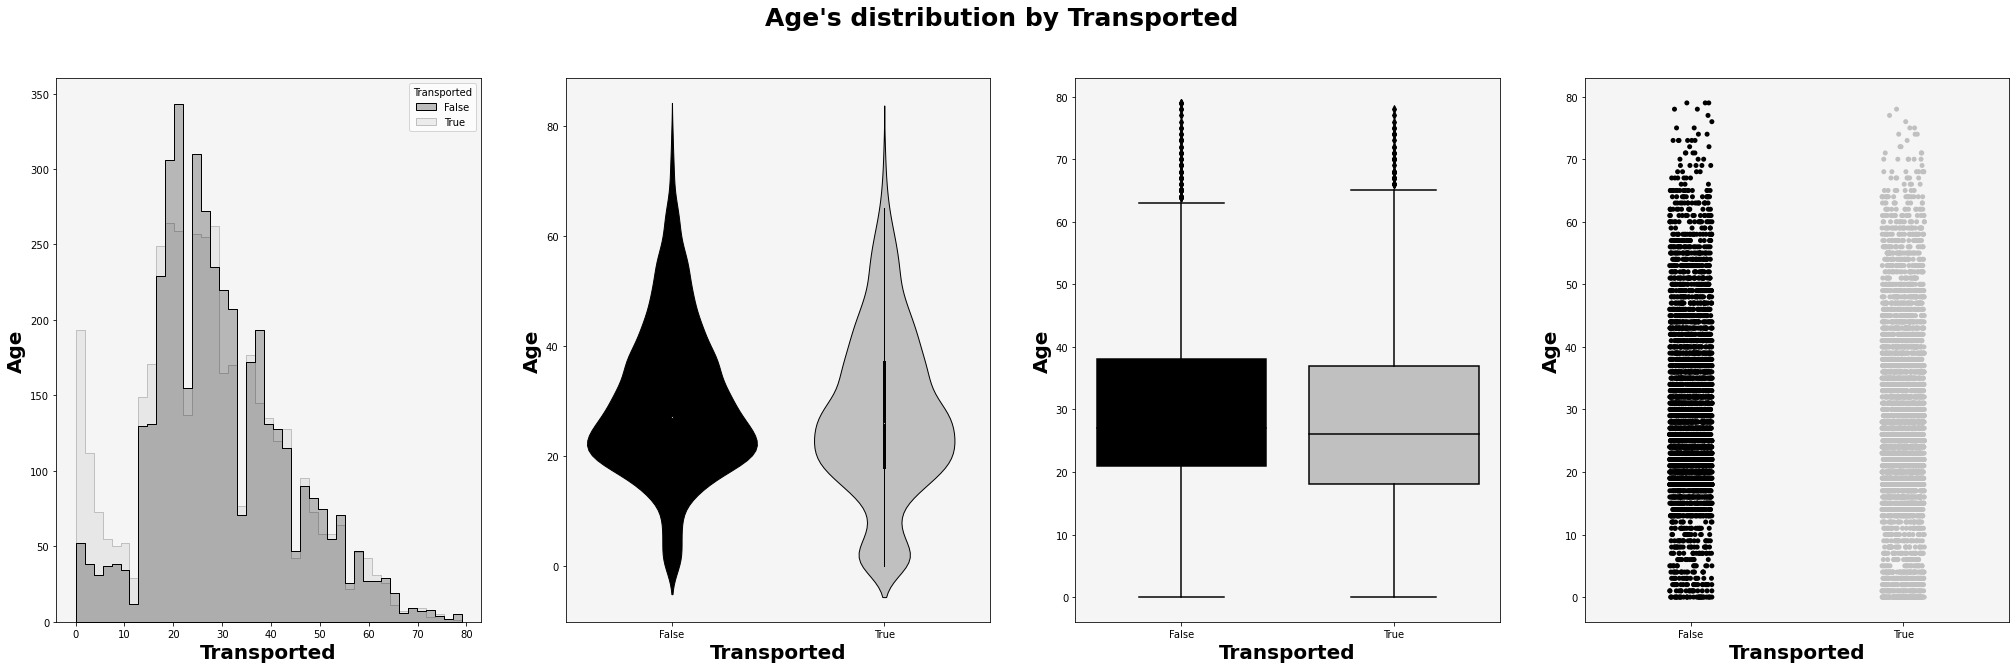

In [43]:
continuous_dist(df_train, 'Transported', 'Age')


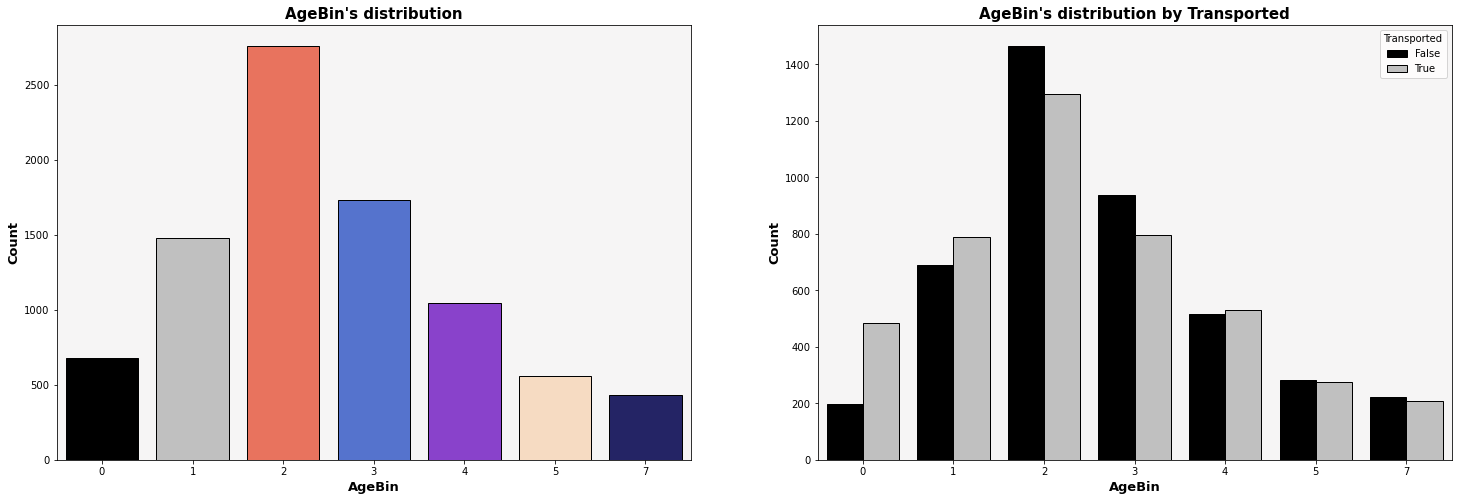

In [44]:
tmp = df_train.copy()
tmp['AgeBin'] = 7
for i in range(6):
    tmp.loc[(tmp.Age >= 10*i) & (tmp.Age < 10*(i + 1)), 'AgeBin'] = i
cat_dist(tmp, var='AgeBin', hue='Transported', msg_show=False)

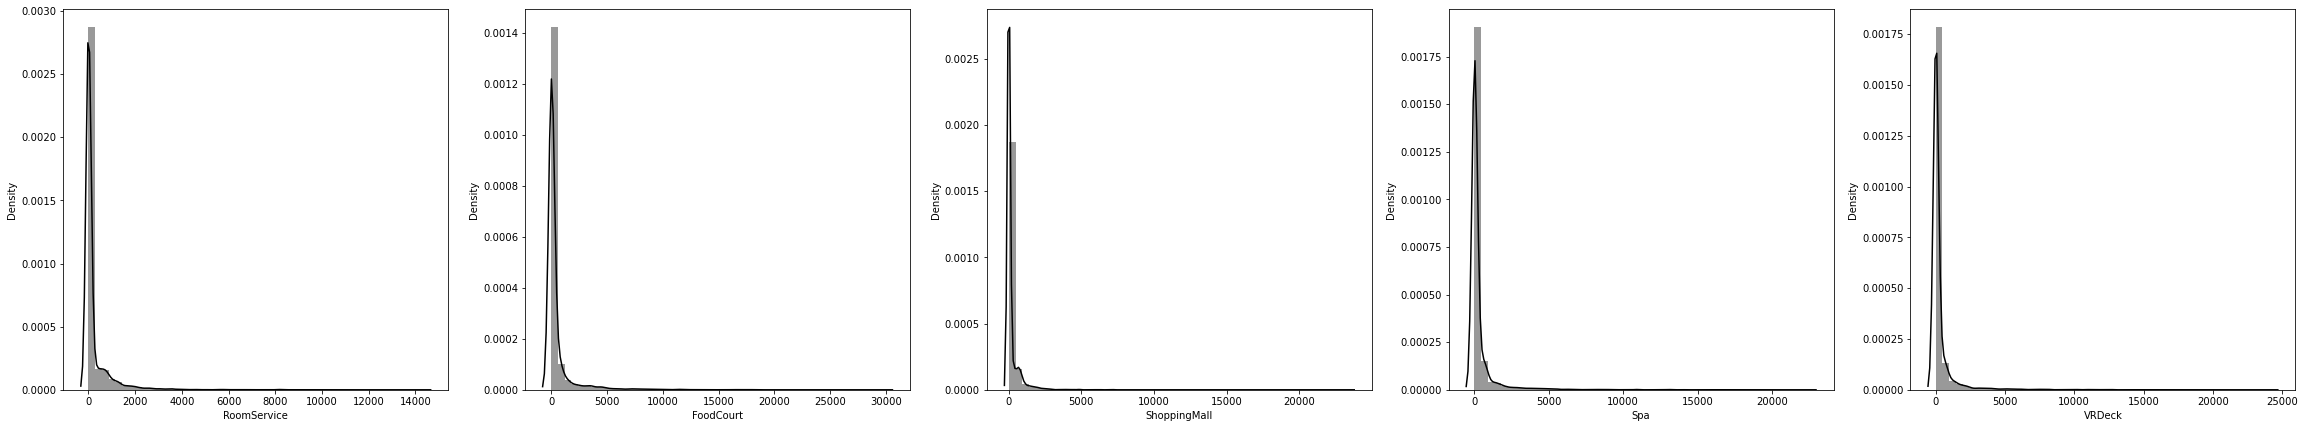

In [45]:
f, ax = plt.subplots(1, 5, figsize=(40, 7))
sns.distplot(df_train.RoomService, ax=ax[0])
sns.distplot(df_train.FoodCourt, ax=ax[1])
sns.distplot(df_train.ShoppingMall, ax=ax[2])
sns.distplot(df_train.Spa, ax=ax[3])
sns.distplot(df_train.VRDeck, ax=ax[4])
plt.show()

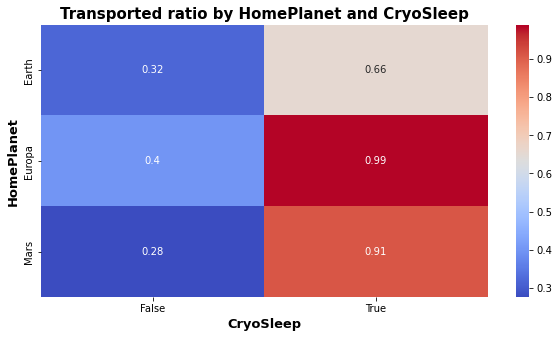

In [46]:
plt.subplots(figsize=(10, 5))
g = sns.heatmap(df_train.pivot_table(index='HomePlanet', columns='CryoSleep', values='Transported'), annot=True, cmap="coolwarm")
g.set_title('Transported ratio by HomePlanet and CryoSleep', weight='bold', size=15)
g.set_xlabel('CryoSleep', weight='bold', size=13)
g.set_ylabel('HomePlanet', weight='bold', size=13)
plt.show()

pd.crosstab([df_train.CryoSleep, df_train.Transported], df_train.HomePlanet,margins=True).style.background_gradient(cmap='RdYlBu')

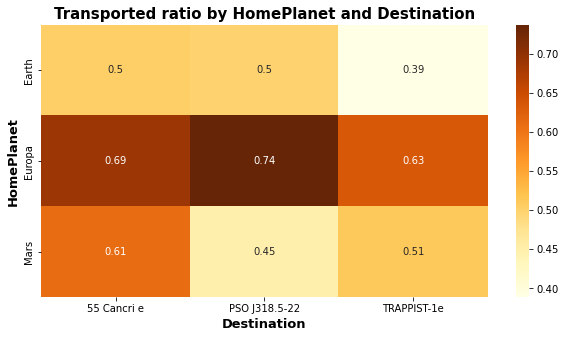

In [47]:
plt.subplots(figsize=(10, 5))
g = sns.heatmap(df_train.pivot_table(index='HomePlanet', columns='Destination', values='Transported'), annot=True, cmap="YlOrBr")
g.set_title('Transported ratio by HomePlanet and Destination', weight='bold', size=15)
g.set_xlabel('Destination', weight='bold', size=13)
g.set_ylabel('HomePlanet', weight='bold', size=13)
plt.show()

pd.crosstab([df_train.Destination, df_train.Transported], df_train.HomePlanet,margins=True).style.background_gradient(cmap='cool')

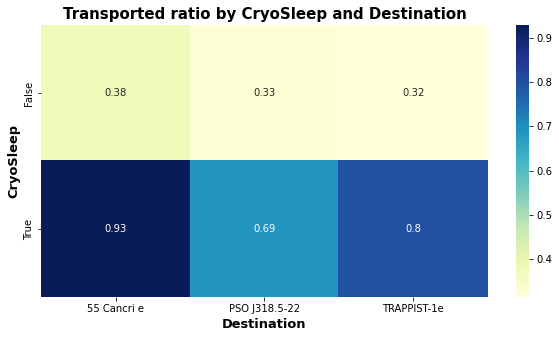

In [48]:
plt.subplots(figsize=(10, 5))
g = sns.heatmap(df_train.pivot_table(index='CryoSleep', columns='Destination', values='Transported'), annot=True, cmap="YlGnBu")
g.set_title('Transported ratio by CryoSleep and Destination', weight='bold', size=15)
g.set_xlabel('Destination', weight='bold', size=13)
g.set_ylabel('CryoSleep', weight='bold', size=13)
plt.show()

pd.crosstab([df_train.CryoSleep, df_train.Transported], df_train.Destination,margins=True).style.background_gradient()

In [50]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [51]:
tID=train_df['PassengerId']
cats=['HomePlanet','Cabin','Destination','CryoSleep','VIP','Name']
train_df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [52]:
train_df.isnull().sum()* 100 / len(train_df)


PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [53]:
train_df['RoomService']=train_df['RoomService'].fillna(0)
train_df['FoodCourt']=train_df['FoodCourt'].fillna(0)
train_df['ShoppingMall']=train_df['ShoppingMall'].fillna(0)
train_df['Spa']=train_df['Spa'].fillna(0)
train_df['VRDeck']=train_df['VRDeck'].fillna(0)

In [54]:
test_df['RoomService']=test_df['RoomService'].fillna(0)
test_df['FoodCourt']=test_df['FoodCourt'].fillna(0)
test_df['ShoppingMall']=test_df['ShoppingMall'].fillna(0)
test_df['Spa']=test_df['Spa'].fillna(0)
test_df['VRDeck']=test_df['VRDeck'].fillna(0)

In [55]:
for i in train_df.columns:
    if train_df[i].isna().sum()>0:

        if i not in cats:
            train_df[i]=train_df[i].fillna(train_df.groupby('Transported')[i].transform('mean'))
for i in test_df.columns:
    if test_df[i].isna().sum()>0:

        if i not in cats:
            test_df[i]=test_df[i].fillna(test_df[i].mean())

In [56]:
train_df['Cabin']=train_df['Cabin'].fillna(method='ffill')
test_df['Cabin']=test_df['Cabin'].fillna(method='ffill')

train_df['deck'] = train_df['Cabin'].apply(lambda x: x.split('/')[0])
train_df['num'] = train_df['Cabin'].apply(lambda x: x.split('/')[1])
train_df['side'] = train_df['Cabin'].apply(lambda x: x.split('/')[2])

test_df['deck'] = test_df['Cabin'].apply(lambda x: x.split('/')[0])
test_df['num'] = test_df['Cabin'].apply(lambda x: x.split('/')[1])
test_df['side'] = test_df['Cabin'].apply(lambda x: x.split('/')[2])

In [57]:
del train_df['Cabin'],test_df['Cabin']
cats.remove('Cabin')
cats.append('deck')
cats.append('num')
cats.append('side')

In [58]:
train_df['CryoSleep']=train_df['CryoSleep'].fillna(False)
test_df['CryoSleep']=test_df['CryoSleep'].fillna(False)

In [60]:
for i in test_df.columns:
    if test_df[i].isna().sum()>0:
        if i in cats:
            test_df[i]=test_df[i].fillna(test_df[i].value_counts(ascending=True).index[-1])

cats.remove('Name')

In [61]:
train_df['group']=train_df['PassengerId'].apply(lambda x: x.split('_')[0])
test_df['group']=test_df['PassengerId'].apply(lambda x: x.split('_')[0])

In [62]:
train_df['Name']=train_df['Name'].fillna(method='ffill')
test_df['Name']=test_df['Name'].fillna(method='ffill')
temp=pd.DataFrame(train_df.groupby(['group'])['Name'])
d={}
for i in range(len(temp)):#len(temp)
    past_last_names=[]
    names=list(temp[1][i])
    rltvs=1
    for j in range(len(list(temp[1][i]))):#len(list(temp[1][i]))
        if(names[j].split(' ')[1] in past_last_names):
            rltvs+=1
        past_last_names.append(names[j].split(' ')[1])

    d[f"{temp[0][i]}"]=rltvs

train_df['has_relatives']=train_df['group'].map(d)



temp=pd.DataFrame(test_df.groupby(['group'])['Name'])
d={}
for i in range(len(temp)):#len(temp)
    past_last_names=[]
    names=list(temp[1][i])
    rltvs=1
    for j in range(len(list(temp[1][i]))):#len(list(temp[1][i]))
        if(names[j].split(' ')[1] in past_last_names):
            rltvs+=1
        past_last_names.append(names[j].split(' ')[1])
    d[f"{temp[0][i]}"]=rltvs

test_df['has_relatives']=test_df['group'].map(d)
print(train_df)
del train_df['Name'],train_df['group']
del test_df['Name'],test_df['group']

     PassengerId HomePlanet  CryoSleep    Destination   Age    VIP  \
0        0001_01     Europa      False    TRAPPIST-1e  39.0  False   
1        0002_01      Earth      False    TRAPPIST-1e  24.0  False   
2        0003_01     Europa      False    TRAPPIST-1e  58.0   True   
3        0003_02     Europa      False    TRAPPIST-1e  33.0  False   
4        0004_01      Earth      False    TRAPPIST-1e  16.0  False   
...          ...        ...        ...            ...   ...    ...   
8688     9276_01     Europa      False    55 Cancri e  41.0   True   
8689     9278_01      Earth       True  PSO J318.5-22  18.0  False   
8690     9279_01      Earth      False    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa      False    55 Cancri e  32.0  False   
8692     9280_02     Europa      False    TRAPPIST-1e  44.0  False   

      RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0             0.0        0.0           0.0     0.0     0.0    Maham Ofracculy 

In [63]:
train_df['ttl_spnd']=train_df['RoomService']+train_df['FoodCourt']+train_df['ShoppingMall']+train_df['Spa']+train_df['VRDeck']
test_df['ttl_spnd']=test_df['RoomService']+test_df['FoodCourt']+test_df['ShoppingMall']+test_df['Spa']+test_df['VRDeck']

In [64]:
train_df['Adult']=True
train_df.loc[train_df['Age']<18, 'Adult']=False
test_df['Adult']=True
test_df.loc[test_df['Age']<18, 'Adult']=False

In [65]:
print(cats)


['HomePlanet', 'Destination', 'CryoSleep', 'VIP', 'deck', 'num', 'side']


In [66]:
from sklearn.preprocessing import LabelEncoder

for i in cats:
    print(i)
    le=LabelEncoder()
    arr=np.concatenate((train_df[i], test_df[i])).astype(str)
    le.fit(arr)
    train_df[i]=le.transform(train_df[i].astype(str))
    test_df[i]=le.transform(test_df[i].astype(str))

HomePlanet
Destination
CryoSleep
VIP
deck
num
side


In [67]:
t=train_df['Transported']
del train_df['Transported']
train_df['Transported']=t

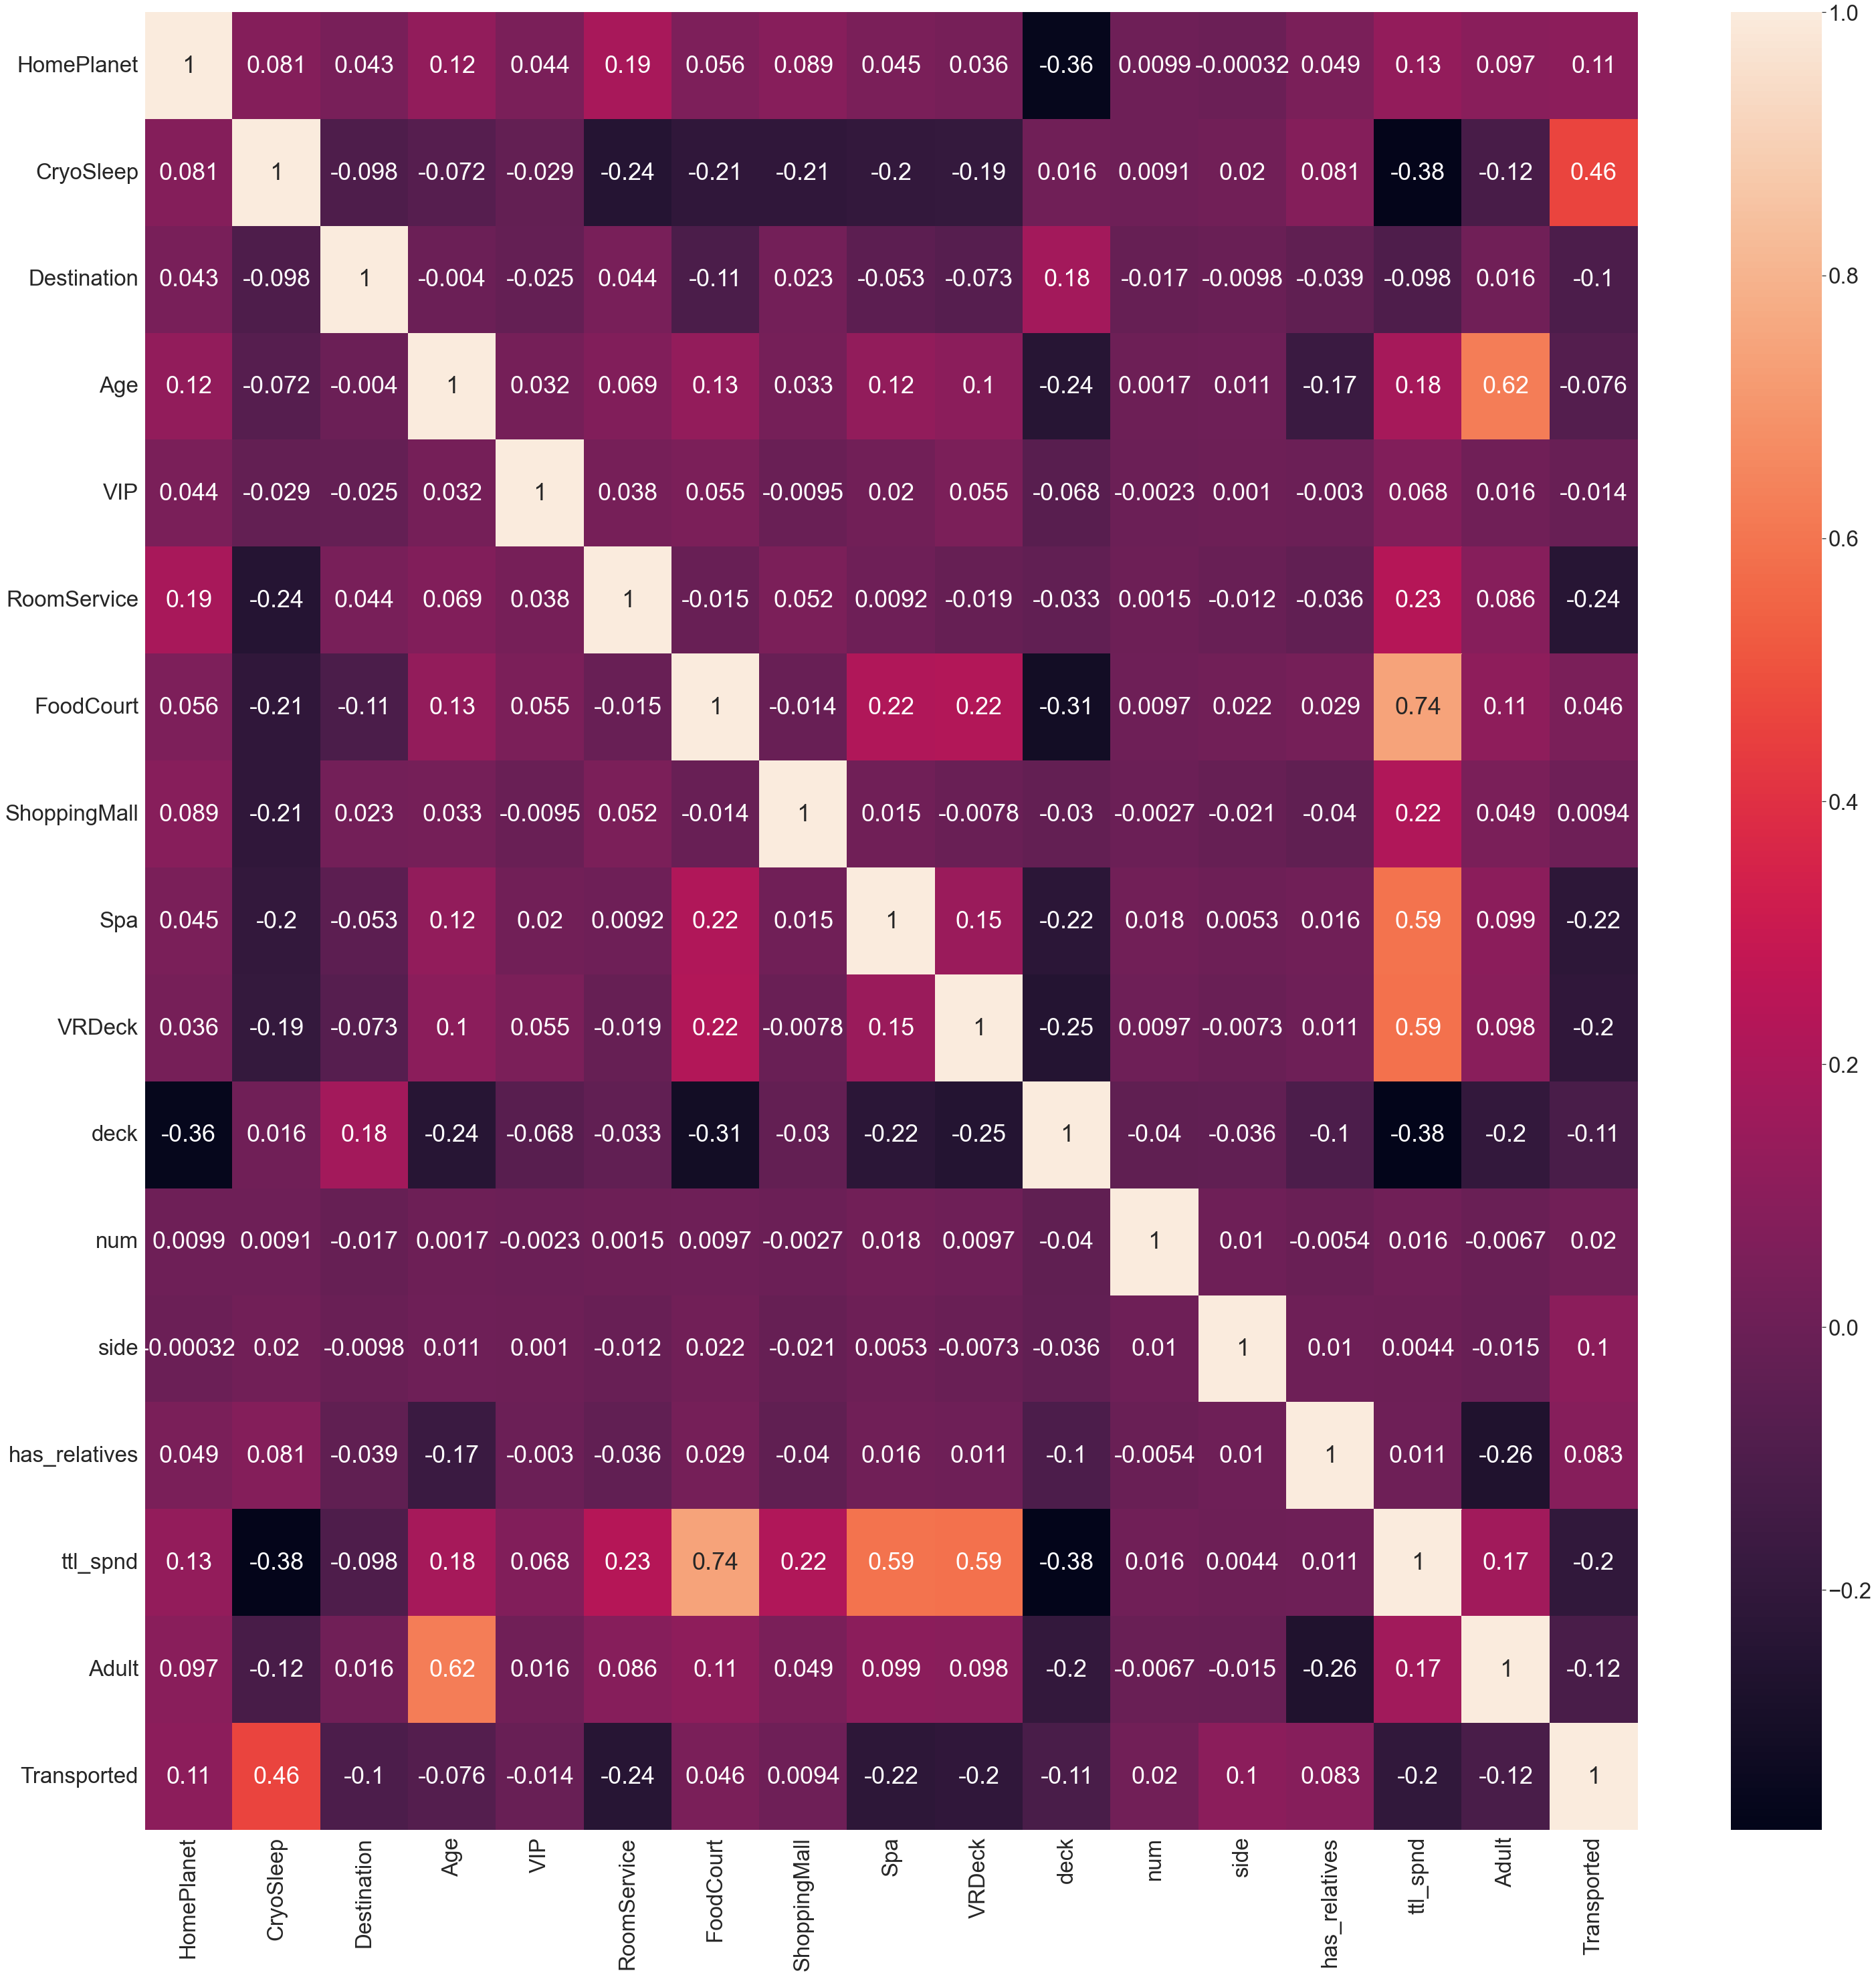

In [68]:
t1=train_df

sns.set_theme(font_scale=3)
plt.figure(figsize=(50,50))
sns.heatmap(t1.corr(), annot=True)
plt.show()

In [69]:
splittus=True


In [70]:
import random
import os
seed=1337
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(seed)

In [71]:
y=train_df['Transported']
y=y.astype(int)

print(train_df.columns)
if splittus:
    from sklearn.model_selection import train_test_split

    X=train_df.drop(columns=['Transported','PassengerId'])

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=seed,shuffle=True)
else:
    X_train=train_df.drop(columns=['Transported','PassengerId'])
    y_train=y

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'deck',
       'num', 'side', 'has_relatives', 'ttl_spnd', 'Adult', 'Transported'],
      dtype='object')


In [73]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=1000,
                         eval_metric='Accuracy',
                        verbose=0)
if splittus:
    model.fit(X_train,y_train,eval_set=(X_val,y_val),use_best_model=True)
else:
    model.fit(X_train,y_train)
print(model.get_best_iteration())
print(model.random_seed_)
print(model.learning_rate_)

242
0
0.05035100132226944


In [74]:
if splittus:
    from sklearn.metrics import accuracy_score
    out=model.predict(X_val)
    out_t=model.predict(X_train)
    
    print(accuracy_score(y_train.values,out_t))
    print(accuracy_score(y_val.values,out))

0.8518177634606535
0.8256669733210672


In [75]:
test=test_df.drop(columns=['PassengerId'])

ans=model.predict(test)
ans=ans.astype(bool)

In [ ]:
subm = pd.read_csv('submission.csv')
subm['Transported']=ans
subm.to_csv('./my_submission.csv',index=False)